# Backup plots

In [1]:
%matplotlib inline

import json
import pylab
import numpy as np
from collections import Counter
from vapor.api import BACKUPFILE
from pysurvey.plot import setup, dateticks, legend
from matplotlib.dates import date2num
from dateutil import parser

In [2]:
cat = json.load(open(BACKUPFILE,'r'))

## Logged Dates

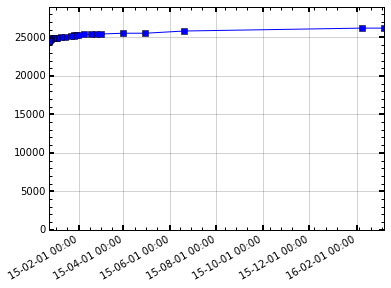

In [3]:
dates, times = zip(*[[parser.parse(x['date']), 
                      np.sum([g[-1] for g in x['games'].itervalues()])]
                    for x in cat[1:]])

setup(yr=[0, round(max(times)*1.1, -3)])
pylab.plot((dates), times, '-s')
dateticks('%y-%m-%d %H:%M')

## Most played games

In [4]:
# {g[0]:g[1] for g in cat[1]['games'].itervalues()}
c = Counter()
for g in cat[1]['games'].itervalues():
    c[g[0]] = g[1]
c.most_common(10)

[(u'Team Fortress 2', 3670),
 (u'Jamestown', 2751),
 (u'Torchlight II', 2713),
 (u'Portal 2', 2280),
 (u'Age of Empires II: HD Edition', 1615),
 (u'Super Meat Boy', 1551),
 (u'Bastion', 1141),
 (u'Castle Crashers', 1001),
 (u'Trine 2', 965),
 (u'Batman: Arkham Asylum GOTY Edition', 838)]

In [5]:
nval = 50
names, values = zip(*[x for x in c.most_common(nval)])
values = np.array(values) / 60.0 # hours

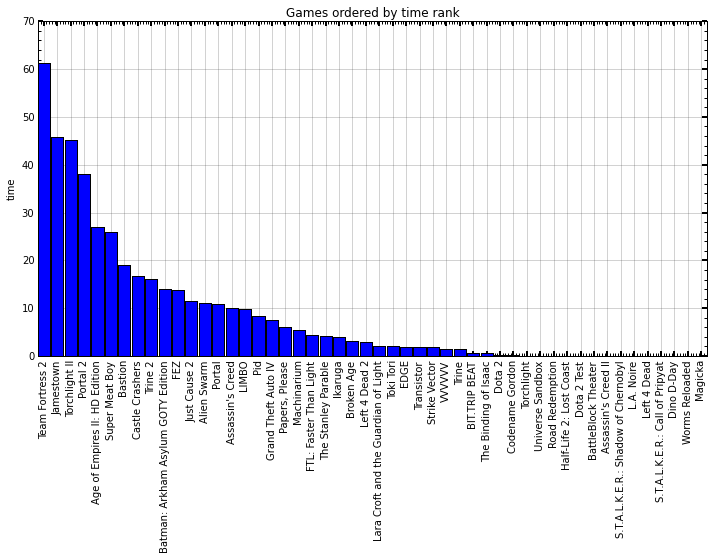

In [6]:
setup(figsize=(12,6),
      title='Games ordered by time rank', ylabel='time',
      xtickv=np.arange(nval)+0.5,
      xticknames=names)
pylab.bar(np.arange(nval)+0.05, values, width=np.ones(nval)*0.9)
pylab.setp(pylab.xticks()[1], rotation=90, ha='center');

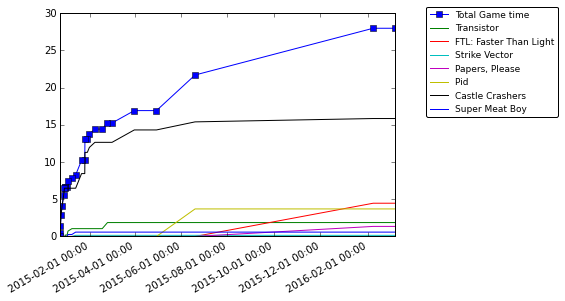

In [7]:
dates = []
total_gametime = []
gametimes = {}
for item in cat[1:]:
    dates.append(parser.parse(item['date']))
    totaltime = 0
    for gameid, (gamename, gametime) in item['games'].iteritems():
        gametime = gametime/60.0 # hours
        if gamename not in gametimes:
            gametimes[gamename] = [[dates[-1], gametime]]
        else:
            tmp = gametimes[gamename]
            gametimes[gamename].append([dates[-1], gametime])
        totaltime += gametime
    total_gametime.append(totaltime)
pylab.plot(dates, total_gametime-np.min(total_gametime), '-s', label='Total Game time')

for gamename,playinfo in gametimes.iteritems():
    x,y = map(np.array, zip(*playinfo))
    ii = np.argsort(x)
    
    if len(np.unique(y)) == 1:
        continue
    pylab.plot(x,y-np.min(y), label=gamename)
legend(bbox_to_anchor=[0,0.95,1.5,0.1])
dateticks('%Y-%m-%d %H:%M')

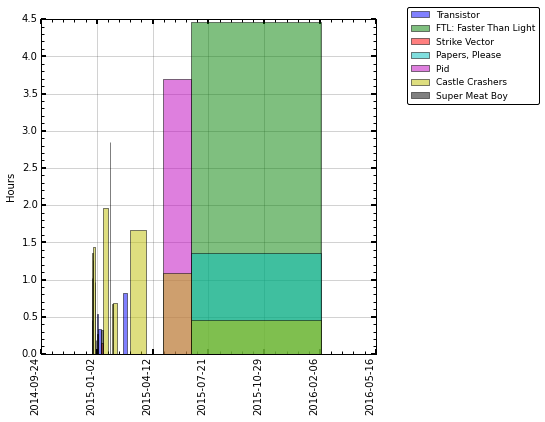

In [8]:
ax = setup(figsize=(6,6), ylabel='Hours')
for gamename,playinfo in gametimes.iteritems():
    x,y = map(np.array, zip(*playinfo))
    x = date2num(x)
    ii = np.argsort(x)
    
    if len(np.unique(y)) == 1:
        continue
    
    color = next(ax._get_lines.color_cycle)
    pylab.bar(x[:-1], np.diff(np.min(y)-y), 
              width=np.diff(x), 
              color=color, alpha=0.5,
              label=gamename)
legend(bbox_to_anchor=[0,0.95,1.5,0.1])
dateticks('%Y-%m-%d', rotation=90)
# dateticks('%Y-%m-%d %H:%M')